In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

In [8]:
df = pd.read_csv('crime_in_Seoul.csv',encoding='cp949')
df.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794


In [9]:
# 상관관계
# 양의 관계, 음의 관계 판단
df.corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000


In [13]:
df[['살인 발생','살인 검거']].head(5)

,살인 발생,살인 검거
0,2,2
1,3,3
2,1,0
3,2,2
4,3,2


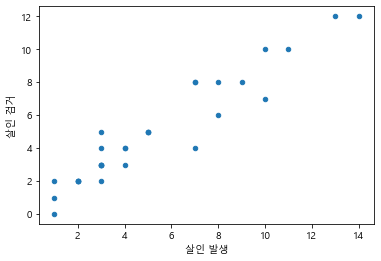

In [16]:
df.plot(kind='scatter',x='살인 발생',y='살인 검거')
plt.show()
# 딥러닝할 때 회귀선 긋는 거 배움

In [75]:
df1 = pd.read_csv('2014년 졸음운전 교통사고.csv',encoding='cp949')
df2 = pd.read_csv('2015년 졸음운전 교통사고.csv',encoding='cp949')
df3 = pd.read_csv('2016년 졸음운전 교통사고.csv',encoding='cp949')
display(df1.head(3))
display(df2.head(3))
display(df3.head(3))

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358


,구분,사고(건),사망(명),부상(명)
0,2015년1월,205,8,375
1,2015년2월,175,8,375
2,2015년3월,237,4,492


,구분,사고(건),사망(명),부상(명)
0,2016년1월,192,5,387
1,2016년2월,174,6,328
2,2016년3월,217,7,435


In [76]:
# data = pd.concat([df1,df2,df3], index_col = '구분')
# data = pd.concat([df1,df2,df3]).reset_index(drop=True)    # index를 숫자로 하는데 초기화하고 싶을 때
# data = pd.concat([df1,df4],ignore_index = True)
data = pd.concat([df1,df2,df3])
data.set_index('구분',inplace=True)
data.head(3)

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358


In [77]:
# data 원본 유지하고 싶을 때 사본 만들어서 사용
dt = data.copy()
dt.head(3)

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358


In [78]:
# 날짜 포맷팅
dt.index = pd.to_datetime(dt.index, format='%Y년%m월')
dt.set_index([dt.index.year, dt.index.month], inplace=True)
dt.index.names = ['연도','월']
dt

사고(건)  사망(명)  부상(명)
연도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

(0.0, 20.0)

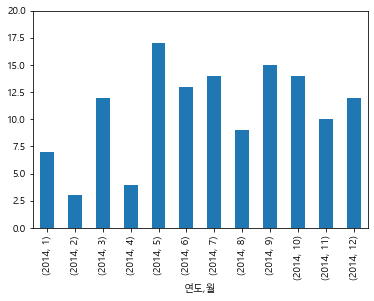

In [79]:
df_2014 = dt['사망(명)'].iloc[0:12]
df_2014.plot(kind='bar')
plt.ylim(0,20)
# plt.xticks(rotation = '0')

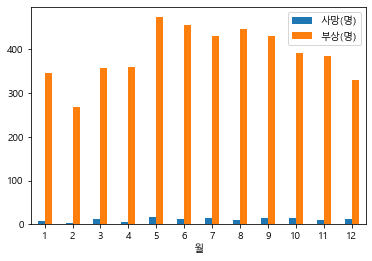

In [88]:
dt.loc[2014][['사망(명)','부상(명)']].plot(kind='bar',rot=0)
plt.show()

In [85]:
y = dt.groupby('연도').mean()[['사망(명)']]
y

,사망(명)
연도,
2014,10.833333
2015,9.000000
2016,8.166667


In [90]:
m = dt.groupby('월').mean()[['사망(명)']]
m.head(3)

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667


#### Time Series

In [95]:
import pandas as pd
import random

In [93]:
dates = pd.date_range('2016-05-01','2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [113]:
tmp1 = pd.Series(np.random.randint(0,100,7), index = dates)
tmp1

2016-05-01    86
2016-05-02    65
2016-05-03    53
2016-05-04    48
2016-05-05    37
2016-05-06    14
2016-05-07    88
Freq: D, dtype: int32

In [114]:
tmp2 = pd.Series(np.random.randint(0,100,7), index = dates)
tmp2

2016-05-01    27
2016-05-02    96
2016-05-03    48
2016-05-04    32
2016-05-05    40
2016-05-06    31
2016-05-07    17
Freq: D, dtype: int32

In [123]:
exam = pd.DataFrame({'math':tmp1,'philosophy':tmp2})
exam

,math,philosophy
2016-05-01,80,27
2016-05-02,92,96
2016-05-03,82,48
2016-05-04,85,32
2016-05-05,97,40
2016-05-06,84,31
2016-05-07,76,17


In [132]:
exam.iloc[5,:]

math          84
philosophy    31
Name: 2016-05-06 00:00:00, dtype: int64

In [134]:
exam['philosophy'][[3,5,6]]

2016-05-04    32
2016-05-06    31
2016-05-07    17
Name: philosophy, dtype: int32

In [144]:
exam['gap'] = exam['math'] - exam['philosophy']
exam

,math,philosophy,gap
2016-05-01,80,27,53
2016-05-02,92,96,-4
2016-05-03,82,48,34
2016-05-04,85,32,53
2016-05-05,97,40,57
2016-05-06,84,31,53
2016-05-07,76,17,59


In [146]:
# 컬럼 이름 바꾸기
exam.rename(columns = {'math':'mathmatics'},inplace=True)
exam

,mathmatics,philosophy,gap
2016-05-01,80,27,53
2016-05-02,92,96,-4
2016-05-03,82,48,34
2016-05-04,85,32,53
2016-05-05,97,40,57
2016-05-06,84,31,53
2016-05-07,76,17,59


In [149]:
exam.drop('gap',axis=1,inplace=True)
exam

,mathmatics,philosophy
2016-05-01,80,27
2016-05-02,92,96
2016-05-03,82,48
2016-05-04,85,32
2016-05-05,97,40
2016-05-06,84,31
2016-05-07,76,17


In [154]:
exam.loc[['2016-05-03','2016-05-04']]

,mathmatics,philosophy
2016-05-03,82,48
2016-05-04,85,32


In [155]:
exam[(exam.index=='2016-05-03')|(exam.index=='2016-05-04')]

,mathmatics,philosophy
2016-05-03,82,48
2016-05-04,85,32


In [159]:
exam[(exam.index<='2016-05-05')&(exam['mathmatics']>=85)]

,mathmatics,philosophy
2016-05-02,92,96
2016-05-04,85,32
2016-05-05,97,40


In [160]:
%matplotlib inline
import matplotlib.pyplot as plt

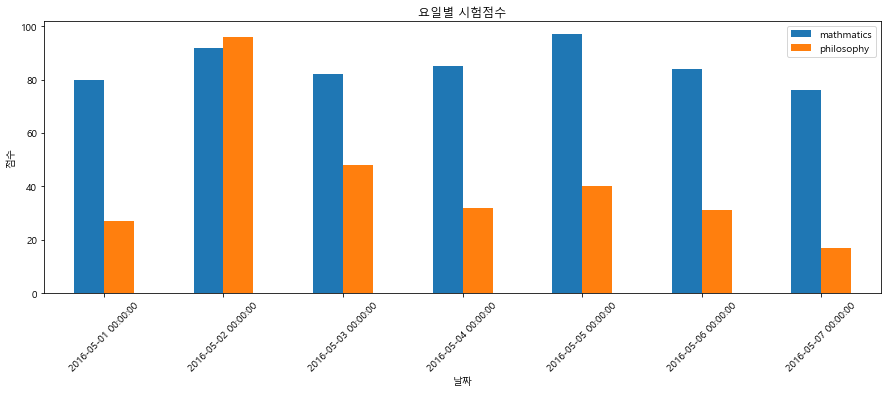

In [168]:
exam.plot(title='요일별 시험점수',figsize=(15,5),kind='bar')
plt.xlabel('날짜')
plt.ylabel('점수')
plt.xticks(rotation='45')
plt.show()

In [171]:
movies = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv')
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [172]:
movies.shape

(979, 6)

In [181]:
movies[movies.duration>=200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [180]:
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

is_long = pd.Series(booleans)

movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [200]:
# contains는 한단어만 가능(여러개 넣으면 넣은 단어가 다 들어가야 뽑아오기 때문에)
movies[movies.genre.str.contains('Crime') | movies.genre.str.contains('Drama') | movies.genre.str.contains('Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [192]:
movies[movies.genre.isin(['Crime','Drama','Action'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


### 나라별 음주현황 data

In [246]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.set_index('country', inplace = True)
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [229]:
drinks['total_litres_of_pure_alcohol'].sum()

910.4000000000001

In [305]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [314]:
all_wine = drinks.groupby('continent').wine_servings.sum()
all_wine

continent
Africa            862
Asia              399
Europe           6400
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64

In [311]:
drinks.groupby('continent').wine_servings.max()

continent
Africa           233
Asia             123
Europe           370
North America    100
Oceania          212
South America    221
Name: wine_servings, dtype: int64

In [315]:
# 다양한 통계치 한번에 볼 때
drinks.groupby('continent').wine_servings.agg(['count','min','max','mean','sum'])

,count,min,max,mean,sum
continent,,,,,
Africa,53,0,233,16.264151,862
Asia,44,0,123,9.068182,399
Europe,45,0,370,142.222222,6400
North America,23,1,100,24.521739,564
Oceania,16,0,212,35.625000,570
South America,12,1,221,62.416667,749


<AxesSubplot:ylabel='wine_servings'>

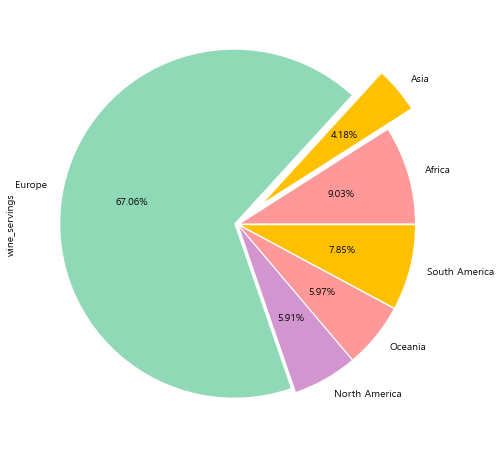

In [326]:
%matplotlib inline
all_wine.plot(figsize=(8,8),kind='pie',autopct = '%0.2f%%', 
                colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], explode=[0.02,0.2,0.02,0.02,0.02,0.02])

In [296]:
drinks[drinks.index.str.contains('Korea')]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
North Korea,0,0,0,0.0,Asia
South Korea,140,16,9,9.8,Asia


Europe_wine = drinks[drinks.continent.str.contains('Europe')]
Europe_wine

In [323]:
pv = drinks.pivot_table(index = 'wine_servings', columns = 'continent',aggfunc='size').fillna(0)
pv

continent,Africa,Asia,Europe,North America,Oceania,South America
wine_servings,,,,,,
0,10.0,18.0,2.0,0.0,1.0,0.0
1,11.0,7.0,0.0,2.0,4.0,1.0
2,6.0,0.0,0.0,3.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,3.0
4,4.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
278,0.0,0.0,1.0,0.0,0.0,0.0
280,0.0,0.0,1.0,0.0,0.0,0.0
312,0.0,0.0,1.0,0.0,0.0,0.0


In [292]:
len(pv), len(pv.columns)

(79, 6)

In [ ]:
pv_sum = []
for i in range(len(pv.columns)):
    for j in range(len(pv.index)):
        pv_sum = pv.index[j] * pv[i][j].values
pv_sum

In [346]:
asia_wine = drinks[drinks.continent.str.contains('Asia')]
asia_wine

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Bahrain,42,63,7,2.0,Asia
Bangladesh,0,0,0,0.0,Asia
Bhutan,23,0,0,0.4,Asia
Brunei,31,2,1,0.6,Asia
Cambodia,57,65,1,2.2,Asia
China,79,192,8,5.0,Asia
North Korea,0,0,0,0.0,Asia
India,9,114,0,2.2,Asia
